In [4]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [15]:
df1 = pd.read_csv('MagicBricks.csv')

In [16]:
df1.head(1)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN


In [17]:
df1.shape

(1259, 11)

In [18]:
df1.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0


In [19]:
df1.groupby('Status')['Status'].agg('count')

Status
Almost_ready       75
Ready_to_move    1184
Name: Status, dtype: int64

In [23]:
df2 = df1.drop(['Status','Bathroom','Transaction'],axis='columns')

In [24]:
df2.head(3)

,Area,BHK,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Semi-Furnished,Rohini Sector 25,1.0,6500000,Builder_Floor,NaN
1,750.0,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0


In [39]:
df2.isnull().sum()

Area            0
BHK             0
Furnishing      0
Locality        0
Parking         0
Price           0
Type            0
Per_Sqft      220
dtype: int64

In [46]:
df3 = df2.dropna(subset=['Furnishing', 'Parking'])

In [48]:
df3.isnull().sum()

Area            0
BHK             0
Furnishing      0
Locality        0
Parking         0
Price           0
Type            0
Per_Sqft      220
dtype: int64

In [51]:
mean_perSqft = df3['Per_Sqft'].mean()
df3['Per_Sqft'].fillna(value=mean_perSqft)

0       15663.630846
1        6667.000000
2        6667.000000
3        6667.000000
4        6667.000000
            ...     
1254    12916.000000
1255    12916.000000
1256    12916.000000
1257    12916.000000
1258    12916.000000
Name: Per_Sqft, Length: 1225, dtype: float64

In [52]:
df3.isnull().sum()

Area          0
BHK           0
Furnishing    0
Locality      0
Parking       0
Price         0
Type          0
Per_Sqft      0
dtype: int64

In [53]:
df3.head(3)

,Area,BHK,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Semi-Furnished,Rohini Sector 25,1.0,6500000,Builder_Floor,15663.630846
1,750.0,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.000000
2,950.0,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.000000


In [55]:
df3.dtypes

Area          float64
BHK             int64
Furnishing     object
Locality       object
Parking       float64
Price           int64
Type           object
Per_Sqft      float64
dtype: object

In [57]:
df4 = df3.drop(['Furnishing'],axis='columns')

In [58]:
df4.head(3)

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Rohini Sector 25,1.0,6500000,Builder_Floor,15663.630846
1,750.0,2,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.000000
2,950.0,2,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.000000


In [59]:
df4.dtypes

Area        float64
BHK           int64
Locality     object
Parking     float64
Price         int64
Type         object
Per_Sqft    float64
dtype: object

In [62]:
len(df['Locality'].unique())
#dimensionality curse

363

In [66]:
df4.Locality = df4.Locality.apply(lambda x: x.strip())
locality_stats = df4.groupby('Locality')['Locality'].agg('count').sort_values(ascending = False)
locality_stats

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       33
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                         

In [73]:
len(locality_stats[locality_stats <=3])

273

In [75]:
 locality_stats_under_3 = locality_stats[locality_stats <=3]

In [76]:
 len(df['Locality'].unique())

363

In [79]:
df4.Locality = df4.Locality.apply(lambda x: 'other' if x in  locality_stats_under_3 else x)

In [83]:
df4.head()

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Rohini Sector 25,1.0,6500000,Builder_Floor,15663.630846
1,750.0,2,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.000000
2,950.0,2,other,1.0,15500000,Apartment,6667.000000
3,600.0,2,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.000000
4,650.0,2,other,1.0,6200000,Builder_Floor,6667.000000


In [82]:
len(df4['Locality'].unique())

81

In [85]:
df4[df4.Area/df4.BHK<100].head()

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
28,28.0,2,Rohini Sector 25,1.0,5000000,Apartment,8750.0
153,100.0,3,Budh Vihar Phase 1,1.0,4300000,Builder_Floor,43000.0
157,75.0,2,Budh Vihar,1.0,3000000,Builder_Floor,40000.0
238,45.0,4,"Batla House, Okhla",1.0,5500000,Builder_Floor,18750.0
341,70.0,1,"Yamuna Vihar, Shahdara",1.0,4500000,Apartment,5357.0


In [86]:
#we need to remove outliers

In [87]:
df4.shape

(1225, 7)

In [89]:
df5 = df4[~(df4.Area/df4.BHK<100)]

In [90]:
df5.shape

(1200, 7)

In [91]:
df5.Per_Sqft.describe()

count      1200.000000
mean      15414.059822
std       18534.266550
min        1259.000000
25%        6714.000000
50%       14366.000000
75%       15663.630846
max      183333.000000
Name: Per_Sqft, dtype: float64

In [96]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Locality'):
        m = np.mean(subdf.Per_Sqft)
        st = np.std(subdf.Per_Sqft)
        reduced_df = subdf[(subdf.Per_Sqft>(m-st))&(subdf.Per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [97]:
df6 = remove_pps_outliers(df5)

In [98]:
df6.shape

(941, 7)

In [127]:
def plot_scatter_chart(df,Locality):
    bhk2 = df[(df.Locality==Locality) & (df.BHK==2)]
    bhk3 = df[(df.Locality==Locality) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet area")
    plt.ylabel("Price")
    plt.title(Locality)
    plt.legend()

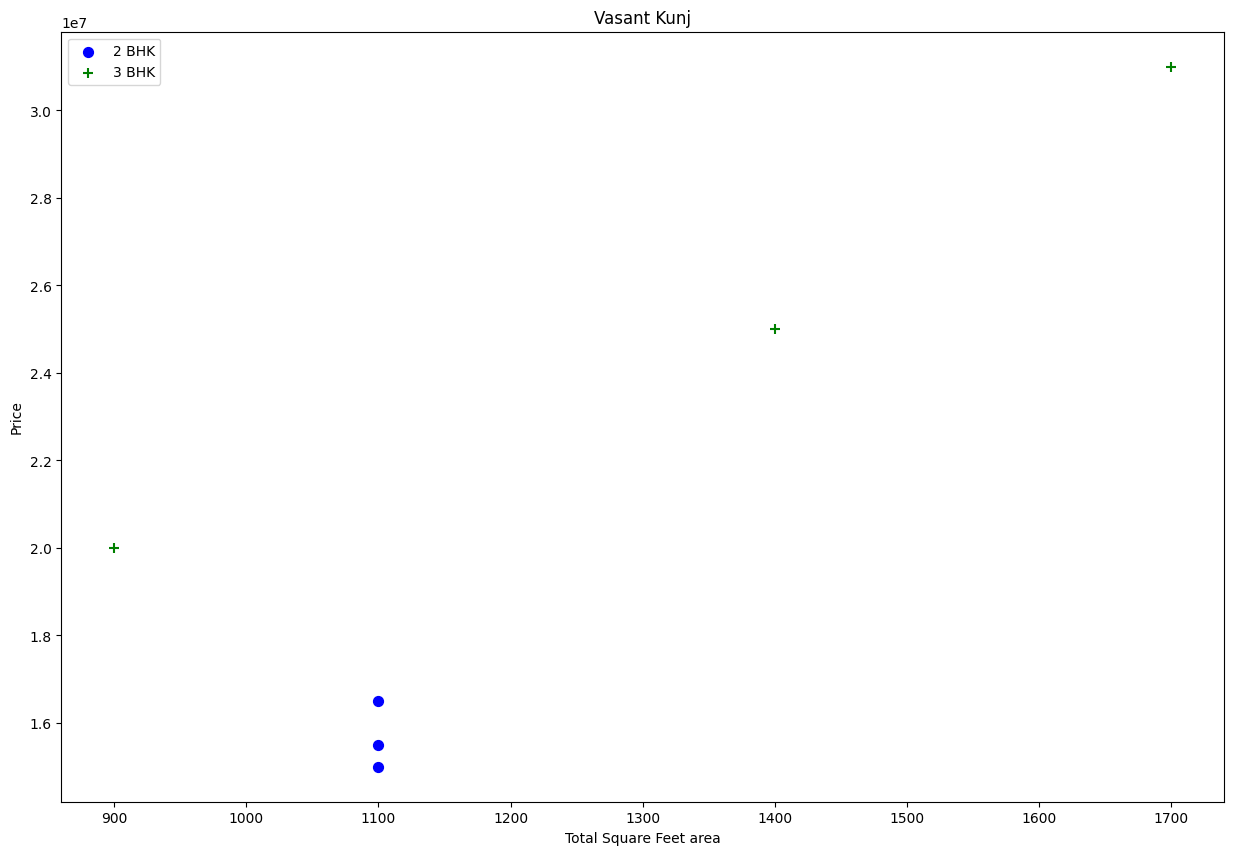

In [130]:
plot_scatter_chart(df6,'Vasant Kunj')

In [132]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locality, locality_df in df.groupby('Locality'):
        bhk_stats = {}
        for bhk, bhk_df in locality_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_Sqft),
                'std': np.std(bhk_df.Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in locality_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(745, 7)

Text(0, 0.5, 'Count')

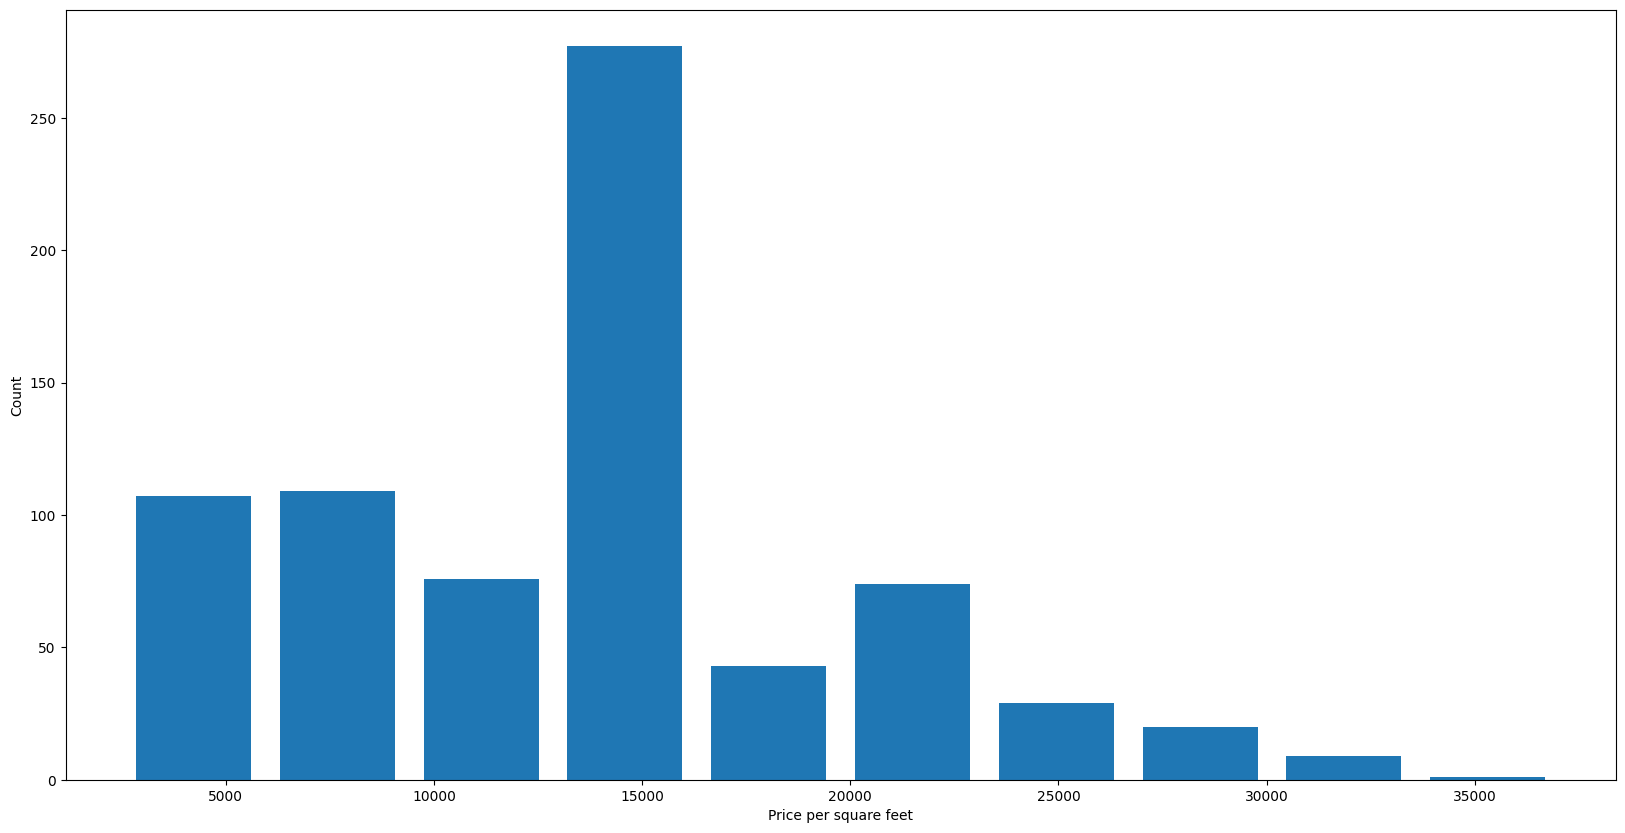

In [133]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.Per_Sqft, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [135]:
df8 = df7.drop(['Area','Per_Sqft'],axis='columns')
df8.head(5)

,BHK,Locality,Parking,Price,Type
0,3,Alaknanda,1.0,19000000,Apartment
1,2,Alaknanda,2.0,15000000,Apartment
2,2,Alaknanda,2.0,17500000,Apartment
3,2,Alaknanda,2.0,14000000,Apartment
4,3,Alaknanda,2.0,15600000,Apartment


In [136]:
df8.shape

(745, 5)

In [138]:
dummies =pd.get_dummies(df8.Locality)

In [141]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis = 'columns')

In [159]:
df9.head(10)

,BHK,Locality,Parking,Price,Type,Alaknanda,"Arjun Nagar, Safdarjung Enclave","Batla House, Okhla",Budh Vihar,Budh Vihar Phase 1,...,Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,3,Alaknanda,1.0,19000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Alaknanda,2.0,15000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Alaknanda,2.0,17500000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,Alaknanda,2.0,14000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,Alaknanda,2.0,15600000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,Alaknanda,1.0,19000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,Alaknanda,1.0,3000000,Builder_Floor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3,Alaknanda,1.0,19000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,Alaknanda,2.0,15000000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2,Alaknanda,2.0,17500000,Apartment,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
df10 = df9.drop(['Locality','Type'],axis='columns')
df10.head(10)

,BHK,Parking,Price,Alaknanda,"Arjun Nagar, Safdarjung Enclave","Batla House, Okhla",Budh Vihar,Budh Vihar Phase 1,Chhattarpur,Chhattarpur Enclave Phase2,...,Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,3,1.0,19000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2.0,15000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,17500000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,14000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,2.0,15600000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,1.0,19000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,1.0,3000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3,1.0,19000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,2.0,15000000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2,2.0,17500000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [169]:
df10.dtypes

BHK                                  int64
Parking                            float64
Price                                int64
Alaknanda                             bool
Arjun Nagar, Safdarjung Enclave       bool
                                    ...   
Uttam Nagar West                      bool
Vasant Kunj                           bool
Vasundhara Enclave                    bool
Vikram Vihar, Lajpat Nagar            bool
Yamuna Vihar, Shahdara                bool
Length: 74, dtype: object

In [155]:
x = df10.drop('Price',axis='columns')
y = df10.Price

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [161]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7627084421133246

In [164]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([ 7.04060777e-01, -3.07746197e+20,  7.41913425e-01,  6.48687336e-01,
        7.14391754e-01])

In [168]:
x.dtypes

BHK                                  int64
Parking                            float64
Alaknanda                             bool
Arjun Nagar, Safdarjung Enclave       bool
Batla House, Okhla                    bool
                                    ...   
Uttam Nagar West                      bool
Vasant Kunj                           bool
Vasundhara Enclave                    bool
Vikram Vihar, Lajpat Nagar            bool
Yamuna Vihar, Shahdara                bool
Length: 73, dtype: object

In [180]:
def predict_price(Locality,Parking,BHK):    
    loc_index = np.where(x.columns==Locality)[0][0]

    x_input = np.zeros(len(x.columns))
    x_input[0] = BHK
    x_input[1] = Parking
    if loc_index >= 0:
        x_input[loc_index] = 1

    return lr_clf.predict([x])[0]

In [181]:
predict_price('Lajpat Nagar',1,2)

C:\Users\Pushpa_Rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. LinearRegression expected <= 2.